<a href="https://colab.research.google.com/github/latruonghai/CS114.K21/blob/master/Recognize1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
!pip install face_recognition

In [15]:
import pickle
"""with open('/content/gdrive/My Drive/ML1/lr.sav','rb') as f:
  model_lr = pickle.load(open(f))"""
model_lr = pickle.load(open('/content/gdrive/My Drive/lr_model_new.sav','rb'))
model_svc = pickle.load(open('/content/gdrive/My Drive/svc_model_news.sav','rb'))
model_svc_new = pickle.load(open('/content/gdrive/My Drive/OpenCv/svc.sav','rb'))

In [16]:
#import CropFace
import os
import cv2
import face_recognition
import dlib
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow
path_train = 'gdrive/My Drive/OpenCv/Train'
path_test = 'gdrive/My Drive/OpenCv/Test'


In [42]:
# With face_recognize
def face_recognize (paths):
  img = cv2.imread(paths)
  imgs = face_recognition.face_encodings(img)
  if len(imgs)>0:
    return imgs[0]
  else:
    return []
def cvrt_fr(path):
  image = []
  lable = []
  for folder in os.listdir(path):
    for files in os.listdir(path + '/' + folder):
      files_name = path + '/' + folder + '/' + files
      imgs = face_recognize(files_name)
      if len(imgs)>0:
        image.append(imgs)
        lable.append(folder)
      else:
        continue
  return image,lable


In [18]:
# With Object_detection

def obj_Detect(img):
  img = cv2.resize(img,(216,216))
  img = rgb2gray(img)
      # Chuyen hinh anh ve dang cac dang object
  fd_perer, imgs_per = hog(img, orientations=8, pixels_per_cell=(8, 8),
              cells_per_block=(3, 3), visualize=True)
  imgs_per = exposure.rescale_intensity(imgs_per,in_range = (0,0.04))
      #img_canny = canny(img, sigma=2)
      #hog()

      #imgss = np.round(img.flatten(), 2)
      #print(imgss)
  imgs = np.reshape(imgs_per,216*216)
  return imgs
  #return np.round(np.asarray([imgs]),2)
def cvrt_od(path):
  image = []
  lable = []

  for folder in os.listdir(path):
    for files in os.listdir(path + '/' + folder):
      files_name = path + '/' + folder + '/' + files
      img = io.imread(files_name)
      imgs = obj_Detect(img)
      image.append(imgs)
      lable.append(folder)

  return np.round(np.asarray(image),2),np.asarray(lable)

In [30]:
def read_path(path,fr = 0):
  if fr==1:
    return cvrt_fr(path)
  else:
    return cvrt_od(path)
  

In [20]:
# Cat va du doan anh

def crDect_face(path,fn):

  faceCasCade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  cap = cv2.VideoCapture(0)

  # Doc hinh

  img = cv2.imread(path)
  img  = cv2.resize(img,(400,int(img.shape[0]*400/img.shape[1])))
  img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  # convert the YUV image back to RGB format
  
  img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
      #grayImag = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face = faceCasCade.detectMultiScale(
          img_output,
          scaleFactor = 1.1,
          minNeighbors = 5,
          minSize = (30,30))
  for (x,y,w,h) in face:
    #sampleNum=sampleNum+1
    image = img[y:y+h,x:x+w]
    result = eval(fn+'(image)')
          #Lưu ảnh khuôn mặt vào thư mục có tên(creatình
          #if not os.path.exists(path +'/'+createf): os.mkdir(path +'/'+createf)
          # Thểm ảnh xoay
          # Thêm ảnh đã cắt
          #cv2.imwrite(path+'/'+createf+"/"+name_file+'-'+ str(sampleNum) + ".jpg", cv2.resize(image,(216,216)))
      # Hiển thị ra màn hình
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 2)
    cv2.putText(img, result[0], (x-10, y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    print(x,y)

          #if sampleNum>200:
              #break
  cv2_imshow(cv2.resize(img,(500,int(img.shape[0]*500/img.shape[1]))))
  return image
# Dua anh ve dinh dang object cua model_svc_thuong


In [21]:
# Voi Face_recognition
img_size = 50
def svc_det_fr(image):
  #img = cv2.imread(path)
  # Face Recognition
  img_enc=face_recognition.face_encodings(image)
  result = model_svc_new.predict(img_enc[0].reshape(1,-1)) if len(img_enc)!=0 else ['unknown']
  return result 
  

In [22]:
# Voi SVC_object_detection
def svc_det_od(image):
  return model_svc.predict(obj_Detect(image = image))

In [23]:
mode_1 = "svc_det_fr"

mode_2 = "svc_det_od"
# Insert Picture

image = cv2.imread(paths)

Mode: SVC with face recognition:

129 54


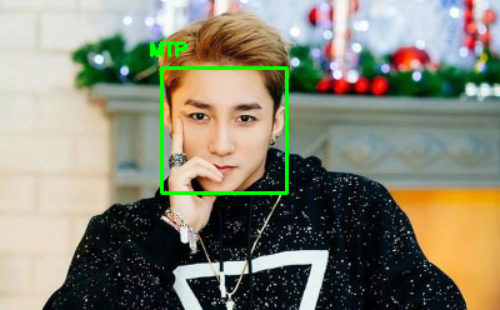

In [26]:
paths = "/content/ND4.jpg"
image = cv2.imread(paths)
print("Mode: SVC with face recognition:\n")
img = crDect_face(paths,mode_1)
#test_x = read(img)
#pred_svc = model_svc.predict(test_x)
#pred_lr = model_lr.predict(test_x)

In [ ]:
print("Mode: SVC with object detection:\n")
img = crDect_face(paths,mode_2)

Mode: SVC with object detection:



TypeError: ignored

In [43]:
path_train = 'drive/My Drive/OpenCv/Train'
x_train,y_train = read_path(path_train,1)




In [45]:
x_train[0].shape

(128,)